In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

## Cross-axis Compensation (Em construção)

Compensação do erro de posicionamento dos sensores.

### Offset

In [5]:
## Ensaio no eixo X [LSB]
Xx_0   = 0.0
Xx_10p = 0.0
Xx_10n = 0.0
Xy_10p = 0.0
Xy_10n = 0.0

Offset_x=(Xx_10p+Xx_10n)/2

## Ensaio no eixo Y [LSB]
Yy_0   = 0.0
Yy_10p = 0.0
Yy_10n = 0.0
Yx_10p = 0.0
Yx_10n = 0.0

Offset_y=(Yy_10p+Yy_10n)/2


print('Posicionamento do ângulo 0° no eixo X: ',Offset_x,'LSB')
print('Posicionamento do ângulo 0° no eixo Y: ',Offset_y,'LSB')

Posicionamento do ângulo 0° no eixo X:  0.0 LSB
Posicionamento do ângulo 0° no eixo Y:  0.0 LSB


### Sensitivity

In [4]:
##X-channel sensitivity in Y-axis direction
Syx=(Dout_B_yx-Dout_A_yx)/2   #[V/g]

##Y-channel sensitivity in Y-axis direction
Syy=(Dout_B_yy-Dout_A_yy)/2   #[V/g]

##Y-channel sensitivity in X-axis direction
Sxy=(Dout_B_xy-Dout_A_xy)/2   #[V/g]

##X-channel sensitivity in X-axis direction
Sxx=(Dout_B_xx-Dout_A_xx)/2   #[V/g]


##Xout_comp

Xout_comp=Dout_x+Syx*((Dout_y-Offset_y)/Syy)  #[V]

##Yout_comp

Yout_comp=Dout_y+Sxy*((Dout_x-Offset_x)/Sxx)  #[V]

NameError: name 'Dout_x' is not defined

## Curva de Calibração: sensor SCA103T-D04

Será realizado ensaio do dispositivo inclinômetro em uma mesa com ajuste de inclinação. A relação linear entre a resposta do sensor, em volts, e o ângulo aplicado na mesa, em graus, é representada no gráfico abaixo. Uma curva de tendência foi gerada a fim de minimizar erros na medição.

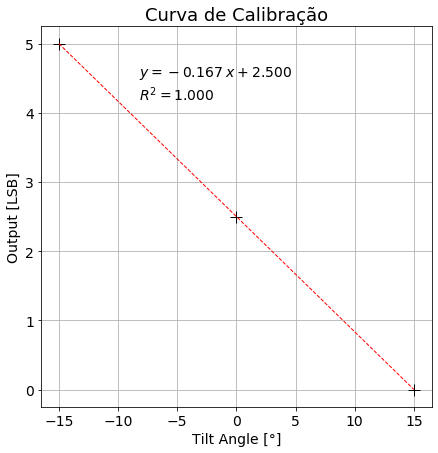

In [5]:
#Valores do Ensaio de Calibração
x = np.array([-15.0, 0.0, 15.0])               # Valores de inclinação [graus]
y = np.array([  5.0, 2.5,  0.0])               # Valores lidos no sensor [volts]
z = np.polyfit(x, y, 1)                        # Calcula os coeficientes de uma função de tendência (linear)
y_hat = np.poly1d(z)(x)                        # Gera os pontos baseando-se na função de tendência

plt.figure(1, figsize=(7,7))
plt.title('Curva de Calibração', fontsize=18)
plt.plot(x,y,"+", ms=12, mec="k")
plt.plot(x, y_hat, "r--", lw=1);
text = f"$y={z[0]:0.3f}\;x{z[1]:+0.3f}$\n$R^2 = {r2_score(y,y_hat):0.3f}$";
plt.gca().text(0.25, .9, text,transform=plt.gca().transAxes, fontsize=14, verticalalignment='top');
plt.xticks(fontsize=14); plt.yticks(fontsize=14);
plt.xlabel('Tilt Angle [°]', fontsize=14); plt.ylabel('Output [LSB]', fontsize=14);
plt.grid();

## Leitura e Conversão de Dados

In [ ]:
DimData = pd.read_excel('DATA/DATA.xlsx')
data_a=DimData.values
data_d=data_a

lines=np.size(data_a,0)
colums=np.size(data_a,1)

# Conversão do valor analógico do sensor [volts] em inclinação [graus]
for i in range(lines):
    data_d[i][1]=(data_a[i][1]-z[1])/(-z[0])
    data_d[i][2]=(data_a[i][2]-z[1])/(-z[0])

## Cálculo de Deslocamentos

In [ ]:
desloc=np.zeros((lines,colums))
desloc[:,0]=data_d[:,0]

for i in range(lines-1):
    desloc[i+1][1]=desloc[i][1]+(desloc[i+1][0]-desloc[i][0])*-np.tan(np.radians(data_d[i][1]))
    desloc[i+1][2]=desloc[i][2]+(desloc[i+1][0]-desloc[i][0])*-np.tan(np.radians(data_d[i][2]))

In [ ]:
plt.figure(2, figsize=(8,10))
eixo=np.array(['X','Y'])
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.plot(desloc[:,1], desloc[:,0])
    plt.xlabel('Deslocamento - Eixo {0:2.1}[cm]'.format(eixo[i]), fontsize=14); plt.ylabel('Cota [cm]', fontsize=14);
    plt.xticks(fontsize=14); plt.yticks(fontsize=14);
    plt.tight_layout(3);
    plt.grid();

## Código em Fase de Teste

In [ ]:
Leitura_x=-45
Leitura_y=45
Leitura_z=0


alpha_x=0
alpha_y=0
alpha_z=0


Lx=np.array([[1,0,0]])
Ly=np.array([[0,1,0]])
Lz=np.array([[0,0,1]])


Rx=np.array([[1.0,                                   0.0,                                     0.0],
             [0.0, np.cos(np.radians(alpha_x+Leitura_x)),  -np.sin(np.radians(alpha_x+Leitura_x))],
             [0.0, np.sin(np.radians(alpha_x+Leitura_x)),   np.cos(np.radians(alpha_x+Leitura_x))]])

Ry=np.array([[ np.cos(np.radians(alpha_y+Leitura_y)), 0.0,  np.sin(np.radians(alpha_y+Leitura_y))],
             [0.0                                   , 1.0,                                      0],
             [-np.sin(np.radians(alpha_y+Leitura_y)), 0.0,  np.cos(np.radians(alpha_y+Leitura_y))]])

Rz=np.array([[  np.cos(np.radians(alpha_z+Leitura_z)),  -np.sin(np.radians(alpha_z+Leitura_z)), 0.0],
             [  np.sin(np.radians(alpha_z+Leitura_z)),  np.cos(np.radians(alpha_z+Leitura_z)), 0.0],
             [                                   0.0,                                    0.0, 1.0]])


P2=np.dot(np.linalg.inv(Rx),np.dot(np.linalg.inv(Ry), np.dot(Rz, np.dot(Ry,Rx))))
P1=np.dot(np.linalg.inv(Rx),np.dot(Ry,np.dot(Rx,P2)))
P0=np.dot(Rx, P1)
P=np.dot(Rz,np.dot(Rx,np.dot(Ry,np.dot(np.linalg.inv(Ry),np.dot(np.linalg.inv(Rx),np.linalg.inv(Rz))))))

R=np.dot(np.dot(Rz,Ry),Rx)

#print (Rx)
#print (Ry)
#print (Rz)
print (R)
Cx=np.dot(R,Lx.T)
Cy=np.dot(R,Ly.T)
Cz=np.dot(R,Lz.T)

#print(Cz)

In [ ]:
Leitura_x=0
Leitura_y=0
#Leitura_z=0


alpha_x=45
alpha_y=45
alpha_z=0

#EIXO X
X=1
z=np.cos(np.radians(Leitura_x+alpha_x))
x=np.sin(np.radians(Leitura_x+alpha_x))*np.cos(np.radians(alpha_z))
y=np.sin(np.radians(Leitura_x+alpha_x))*np.sin(np.radians(alpha_z))

#EIXO Y
Y=1
z=np.cos(np.radians(Leitura_x+alpha_x))
x=np.sin(np.radians(Leitura_x+alpha_x))*np.cos(np.radians(alpha_z))
y=np.sin(np.radians(Leitura_x+alpha_x))*np.sin(np.radians(alpha_z))

In [ ]:
print (np.degrees(np.arctan(y/z)))
print (x,y,z)

In [ ]:
R=np.array([ [                                   0 ,                                     0, 1.0],
             [   np.sin(np.radians(alpha_x+alpha_z)),  np.cos(np.radians(alpha_x+alpha_z)), 0.0],
             [  -np.cos(np.radians(alpha_x+alpha_z)),  np.sin(np.radians(alpha_x+alpha_z)), 1.0]])

print (R*Ly)